### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [4]:
# Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
# 컬럼 선택 : 'Close' 'Start' 'High' 'Low'
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

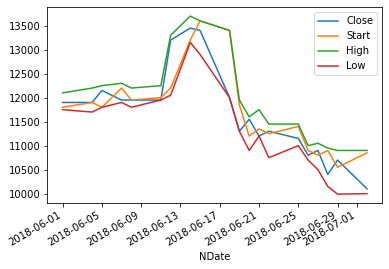

In [5]:
# 선 그래프
df1.plot()

<AxesSubplot:xlabel='NDate'>

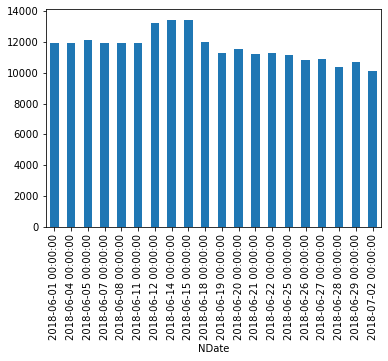

In [7]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar')

<AxesSubplot:xlabel='NDate'>

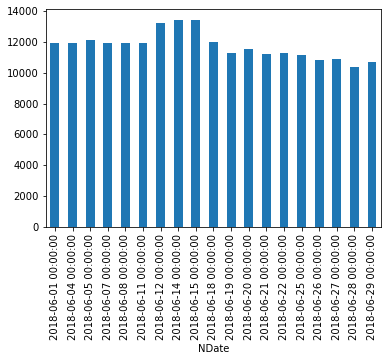

In [12]:
# Q. 6월만을 추출하여 Close 칼럼으로 일별 막대 그래프를 표현하세요
df1.loc['2018-6','Close'][::-1].plot(kind='bar')

In [14]:
df1.Close.value_counts()

11950    3
11300    2
11900    2
10400    1
13450    1
10700    1
11150    1
10800    1
12000    1
13200    1
10100    1
12150    1
13400    1
11200    1
10900    1
11550    1
Name: Close, dtype: int64

<AxesSubplot:ylabel='Frequency'>

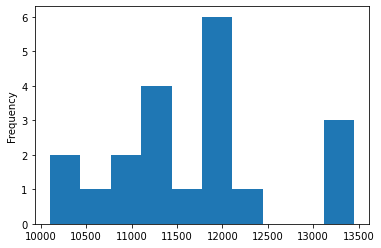

In [17]:
df1.Close.plot(kind='hist',bins=10)

<AxesSubplot:ylabel='Frequency'>

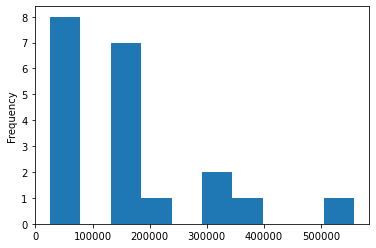

In [21]:
# Q. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.
df.Volume.plot(kind='hist')

<AxesSubplot:xlabel='Close', ylabel='Volume'>

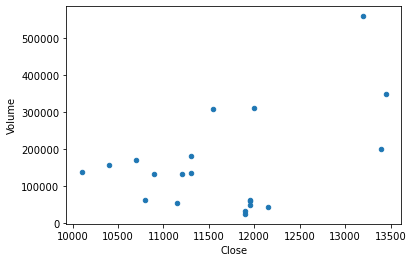

In [22]:
# Q. Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.
df.plot(x='Close',y='Volume',kind='scatter')

In [23]:
df.corr()

,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


<AxesSubplot:>

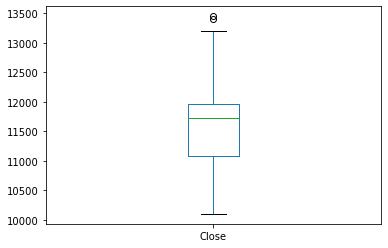

In [24]:
# Q. Close 칼럼의 Box Plot을 표현하세요.
df.Close.plot(kind='box')

In [25]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수 (3사분위=25%, 1사분위=75%)
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값 

In [4]:
iqr=11087.500000-11962.500000
uw=11087.500000-1.5*iqr
lw=11962.500000-1.5*iqr
print(uw,lw)

12400.0 13275.0


In [ ]:
# Q1 = df.Close.quantile(.25)
# Q3 = df.Close.describe()['75%']
# IQR = Q3 - Q1
# print(Q3 + 1.5 * IQR)
# df.Close.loc[df.Close > Q3 + 1.5 * IQR]


In [30]:
iqr = 11962.500000 - 11087.500000
uw_check = 11962.500000 + iqr*1.5
print(uw_check,'\n')
c = df.Close.sort_values(ascending=False)
print(c[:5],'\n')
df.Close[df.Close >= uw_check]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 



11    13400
12    13450
Name: Close, dtype: int64

In [26]:
# Q. Close 칼럼의 이상치를 구하세요.
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df.Close:
    if not Q1 - IQR*1.5 < i < Q3 + IQR*1.5:
        outlier.append(i)
print(outlier)

[13400, 13450]


In [29]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close']<=(Q1-IQR*1.5))|(df['Close']>=(Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [ ]:
# 과제
# Q. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

# df_ep 과제
- 선그래프
- south 칼럼 막대그래프
- south 칼럼 히스토그램
- boxplot

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('df_ep.xlsx')
df

<AxesSubplot:>

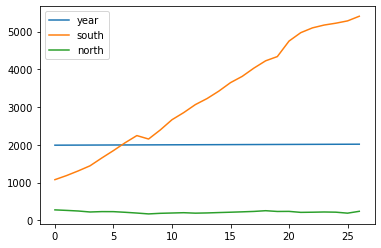

In [9]:
df.plot()

<AxesSubplot:>

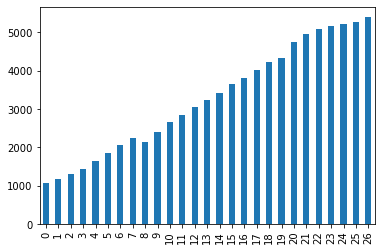

In [13]:
df.south.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

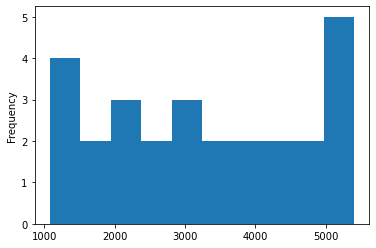

In [12]:
df.south.plot(kind='hist')

<AxesSubplot:>

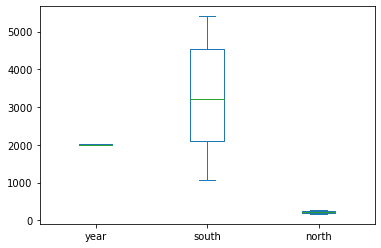

In [14]:
df.plot(kind='box')

[과제]
통계학의 기초 개념을 설명하세요.
1. 모수의 개념 및 사례
2. 통계량의 개념 및 사례
3. 확률변수, 확률, 확률분포
4. 도수, 도수분포, 상대도수
5. 평균값, 기대값, 분산, 표준편차
6. 확률질량함수, 확률밀도함수
7. 정규분포, 이항분포, 포아송분포
8. 표본분산(n), 불편분산(n-1)
9. 기술통계, 추측통계
10. 가설과 검정


In [ ]:
# 과제
# Q. A, B 그룹의 Box Plot을 그리고 이상치를 구하세요.

In [26]:
# 0부터 1000사이의 균일분포를 이루는 난수 생성
data = np.random.rand(10000)*1000
data[:10]
df = pd.DataFrame(data,columns=['Num'])
print(df.head())
df.describe()

          Num
0  400.759739
1  337.627533
2  794.780375
3  930.792920
4  213.538819


,Num
count,10000.000000
mean,498.658867
std,288.244144
min,0.138738
25%,249.069265
50%,499.481279
75%,746.711380
max,999.861352


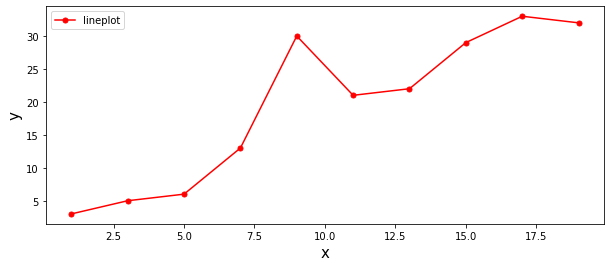

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

plt.figure(figsize=(10,4))
plt.plot(x,y,color='red',marker='o',markersize=5)
# plt.title('Lineplot Matplotlib',size = 20)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])

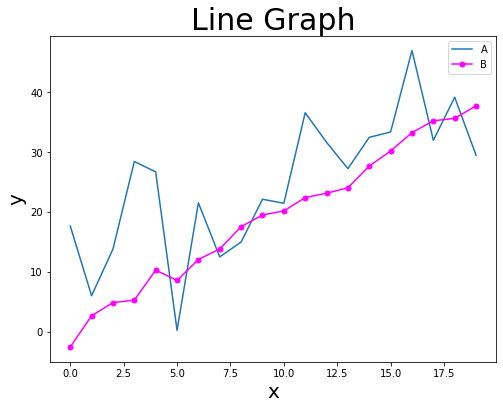

In [37]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
# y1 = np.arange(20)*2 
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(8,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o', markersize=5)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.title('Line Graph',size=30)
plt.legend(['A','B'])

range(0, 10)
[6 9 9 6 5 6 6 6 2 8]


Text(0.5, 0, 'x')

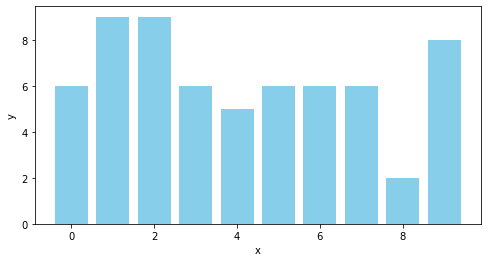

In [58]:
# 과제 - 추가 decoration
# 막대 그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
plt.ylabel('y')
plt.xlabel('x')

In [76]:
# scatter plot
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='blue')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/auto-mpg.xlsx'

In [75]:
# histogram
plt.hist(df_auto.mpg,bins=20,color='gray')

NameError: name 'df_auto' is not defined

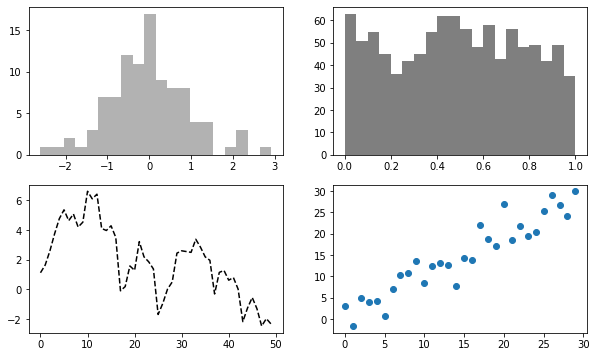

In [77]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.hist(np.random.rand(1000), bins=20, color='k', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
# ax3.plot(x,y,'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

<BarContainer object of 10 artists>

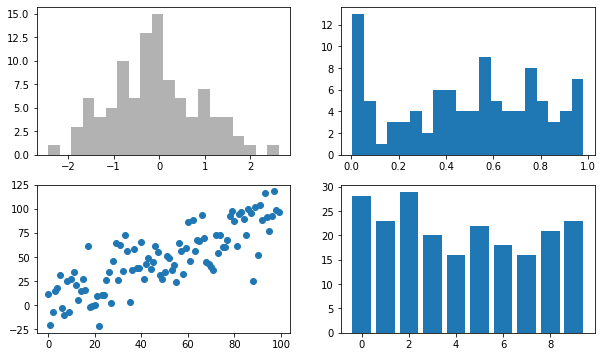

In [72]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.hist(np.random.rand(100), bins = 20)
ax3.scatter(x = np.arange(100), y = np.arange(100) + np.random.randn(100)*20)
ax4.bar(np.arange(10),np.random.randint(15,30, 10))


In [ ]:
# 과제
# Q. 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.

(array([5.00000e+00, 6.00000e+00, 3.20000e+01, 7.10000e+01, 1.99000e+02,
        4.59000e+02, 9.97000e+02, 2.31200e+03, 4.71600e+03, 9.20700e+03,
        1.75580e+04, 3.10930e+04, 5.41360e+04, 8.84940e+04, 1.37368e+05,
        2.03690e+05, 2.87181e+05, 3.88039e+05, 5.00112e+05, 6.13548e+05,
        7.19199e+05, 8.04242e+05, 8.55019e+05, 8.68153e+05, 8.41577e+05,
        7.76381e+05, 6.84643e+05, 5.74265e+05, 4.60083e+05, 3.51321e+05,
        2.56529e+05, 1.78596e+05, 1.18078e+05, 7.42200e+04, 4.45950e+04,
        2.55340e+04, 1.41220e+04, 7.47100e+03, 3.62800e+03, 1.79500e+03,
        7.97000e+02, 3.15000e+02, 1.28000e+02, 5.50000e+01, 2.10000e+01,
        5.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([-5.09072409, -4.87245733, -4.65419058, -4.43592383, -4.21765708,
        -3.99939032, -3.78112357, -3.56285682, -3.34459007, -3.12632331,
        -2.90805656, -2.68978981, -2.47152306, -2.2532563 , -2.03498955,
        -1.8167228 , -1.59845605, -1.38018929, -1

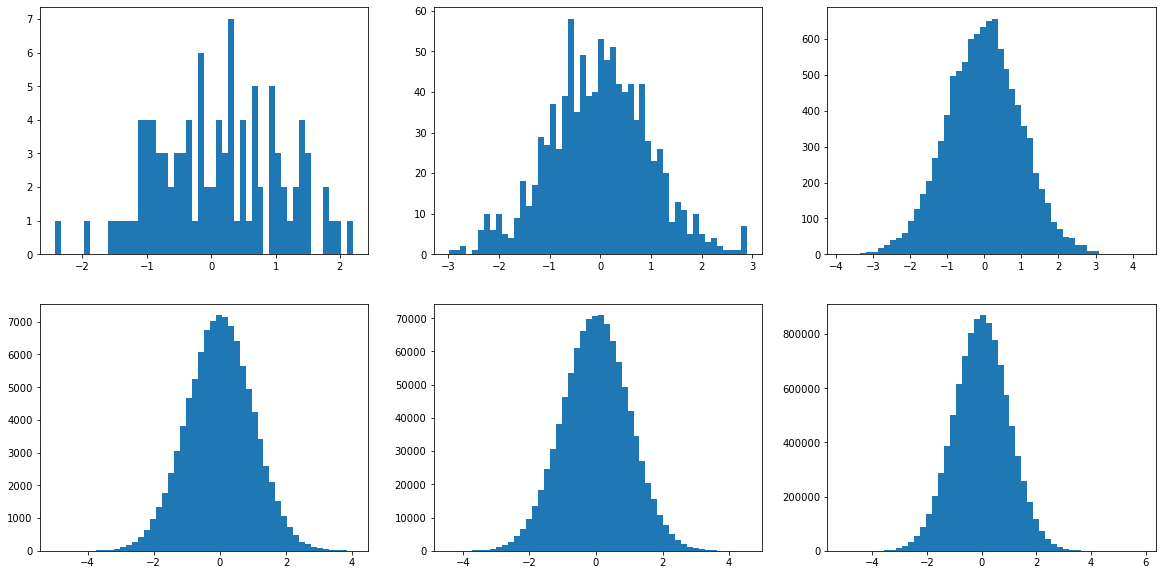

In [78]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)

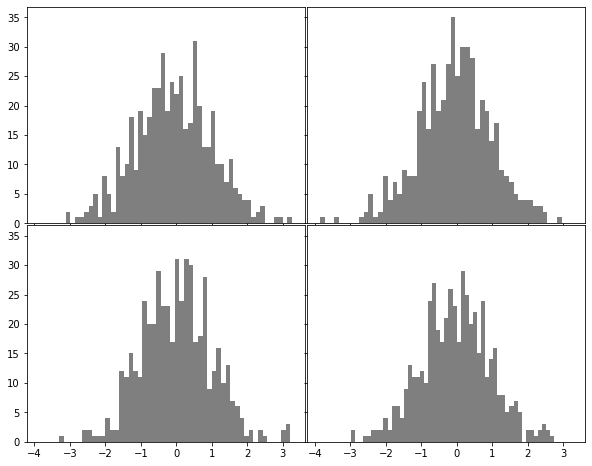

In [79]:
fig,axes = plt.subplots(2,2, figsize=(10,8), sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50, color='k',alpha=0.5)
plt.subplots_adjust(wspace=0.01,hspace=0.01)

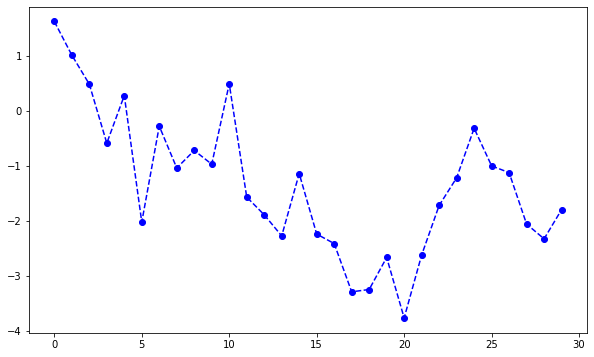

In [85]:
# 색상, 마커, 선 스타일
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(),linestyle='dashed', color='b', marker='o')

In [86]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [94]:
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

Text(0, 0.5, 'Sum')

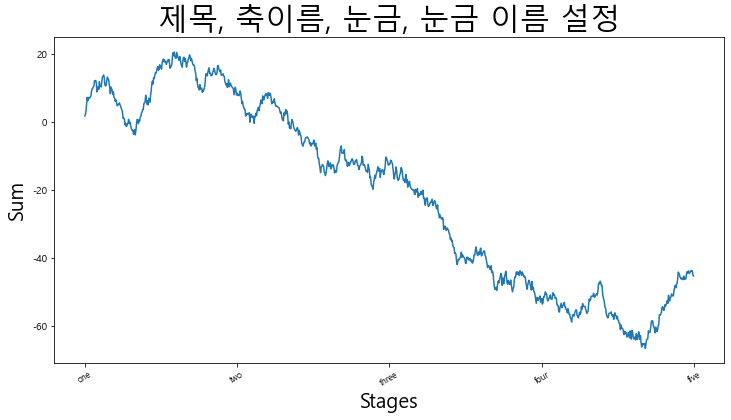

In [95]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font',family='Malgun Gothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=30)
ax.set_xlabel('Stages',size=20)
ax.set_ylabel('Sum',size=20)

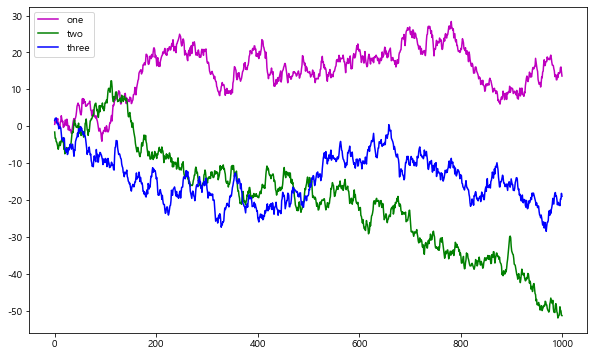

In [96]:
# 범례 추가
from numpy.random import randn
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m', label='one')
ax.plot(randn(1000).cumsum(),'g', label='two')
ax.plot(randn(1000).cumsum(),'b', label='three')
plt.legend(loc='best')

In [80]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
def get_age_cat(age):
    cat = ''
    if age < 15: cat = 'young'
    elif age < 30: cat = 'teen'
    elif age < 45: cat = 'adult'
    elif age < 60: cat = 'mature'
    else: cat = 'elder'
    return cat
df['age_cat'] = df['age'].apply(lambda x : get_age_cat(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


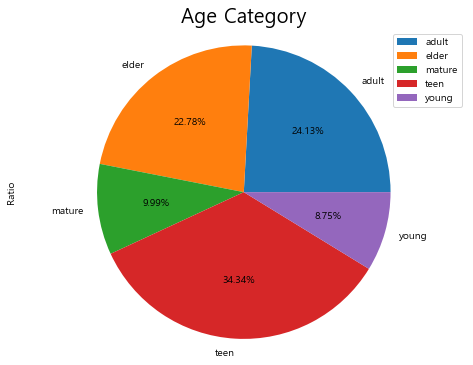

In [102]:
df['Ratio'] = 1
df_age_cat = df.groupby('age_cat').sum()
df_age_cat.Ratio.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('Age Category', size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')

In [ ]:
# 과제
# Q. 시각화 탐색을 통하여 df의 각 칼럼에 대한 인사이틀 기술하세요(5개 이상)
- 의미없는 변수 제거
- 변수 분포
- 종속변수인 survived와 독립변수간 상관관계
- 독립변수간 상관관계
- 분석에 의미있는 파생변수 도출

In [63]:
import pandas as pd

df=pd.read_csv('movie.csv')
df

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466
5,20180220,6,NEW,20179985,코코,56664400,7967


Text(0, 0.5, 'salesAmt')

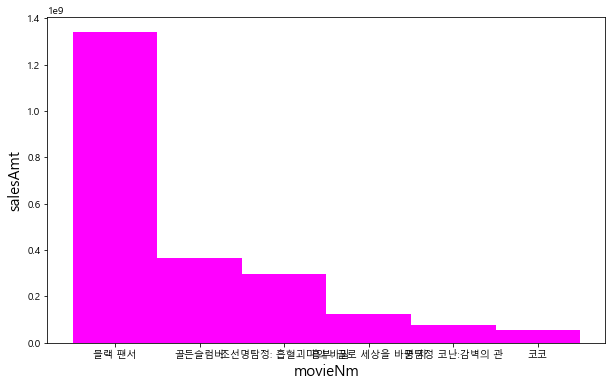

In [74]:
import matplotlib as mlt
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(10,6))
plt.bar(df.movieNm,df.salesAmt,width=1,color='magenta')
plt.xlabel('movieNm',size=15)
plt.ylabel('salesAmt',size=15)

